In [1]:
from mpl_toolkits import mplot3d

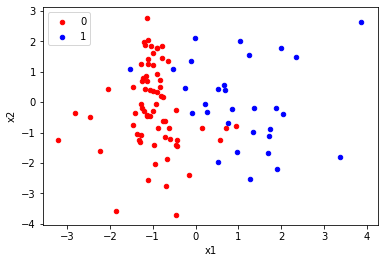

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import pandas as pd
eps = np.finfo(float).eps
from pandas import DataFrame

X, y = make_classification(n_samples = 100, n_features=2, n_redundant=0, n_informative=2, random_state = 0, weights=[0.7, 0.3])
# scatter plot, dots colored by class value
d = {'x1':X[:,0], 'x2':X[:,1], 'y':y}
df = DataFrame(data = d)
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('y')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x1', y='x2', label=key, color=colors[key])
plt.show()

In [16]:
def training_error(data, split1, split2, split3, feature1, feature2):
    data1 = data[(data[feature1] > split1)] 
    data2 = data[(data[feature1] <= split1)]
    d1 = data1[(data1[feature2] > split2)]
    d2 = data1[(data1[feature2] <= split2)]
    d3 = data2[(data2[feature2] > split3)]
    d4 = data2[(data2[feature2] > split3)]
    v1 = len(d1[d1['y'] == 0])/(len(d1['y'])+eps)
    v2 = len(d2[d2['y'] == 0])/(len(d2['y'])+eps)
    v3 = len(d3[d3['y'] == 0])/(len(d3['y'])+eps)
    v4 = len(d4[d4['y'] == 0])/(len(d4['y'])+eps)
    if v1>0.5:
        a = (1-v1)*(1-v1)
    else:
        a = v1*v1
    if v2>0.5:
        b = (1-v2)*(1-v2)
    else:
        b = v2*v2
    if v3>0.5:
        c = (1-v3)*(1-v3)
    else:
        c = v3*v3
    if v4>0.5:
        d = (1-v4)*(1-v4)
    else:
        d = v4*v4
        
    return a+b+c+d
    

In [17]:
training_error(df, 0, 0, 1, 'x1', 'x2')

0.1286426592797784

In [23]:
l = []
for i in range(-3, 4, 2):
    for j in range(-3, 4, 2):
            for k in range(-3, 4, 2):
                l.append([i, j, k, training_error(df, i, j, k, 'x1', 'x2')])
print(l)

[[-3, -3, -3, 0.09565309809756617], [-3, -3, -1, 0.09565309809756617], [-3, -3, 1, 0.09565309809756617], [-3, -3, 3, 0.09565309809756617], [-3, -1, -3, 0.17175336247683498], [-3, -1, -1, 0.17175336247683498], [-3, -1, 1, 0.17175336247683498], [-3, -1, 3, 0.17175336247683498], [-3, 1, -3, 0.21902500000000003], [-3, 1, -1, 0.21902500000000003], [-3, 1, 1, 0.21902500000000003], [-3, 1, 3, 0.21902500000000003], [-3, 3, -3, 0.09182736455463725], [-3, 3, -1, 0.09182736455463725], [-3, 3, 1, 0.09182736455463725], [-3, 3, 3, 0.09182736455463725], [-1, -3, -3, 0.2070523694312284], [-1, -3, -1, 0.20806574984996573], [-1, -3, 1, 0.23001362364969136], [-1, -3, 3, 0.205322265625], [-1, -1, -3, 0.366197635185667], [-1, -1, -1, 0.36721101560440433], [-1, -1, 1, 0.38915888940412996], [-1, -1, 3, 0.3644675313794386], [-1, 1, -3, 0.39590788158400625], [-1, 1, -1, 0.3969212620027436], [-1, 1, 1, 0.4188691358024692], [-1, 1, 3, 0.39417777777777785], [-1, 3, -3, 0.2007833582440982], [-1, 3, -1, 0.201796738

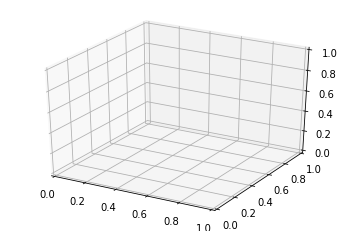

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

In [25]:
x = []
y = []
z = []
te = []
for i, j, k, m in l:
    x.append(i)
    y.append(j)
    z.append(k)
    te.append(m)

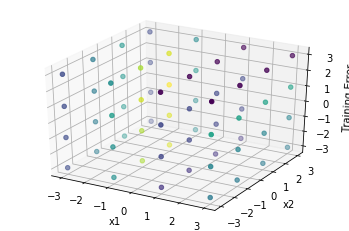

In [27]:
ax = plt.axes(projection='3d')

zdata = np.array(z)
xdata = np.array(x)
ydata = np.array(y)
tedata = np.array(te)

ax.scatter3D(xdata, ydata, zdata, c=te);
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('Training Error');